# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [62]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [63]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

Training set: (50000, 32, 32, 3)
Training Label: (50000, 1)
Test set (10000, 32, 32, 3)
Test labels (10000, 1)
Dimensions: (32, 32, 3)
Number of classes: 100


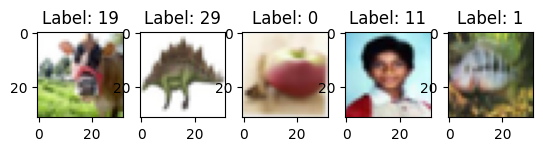

In [64]:
import matplotlib.pyplot as plt

print("Training set:", x_train.shape)
print("Training Label:", y_train.shape)
print("Test set", x_test.shape)
print("Test labels", y_test.shape)
print("Dimensions:", x_train.shape[1:])
print("Number of classes:", len(class_names))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(f'Label: {y_train[i][0]}')
plt.show()

### 1b: Data Preprocessing
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [65]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Normalize the images with pixel values to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# 2) one-hot encoded vectors
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

#80% train, 20% validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [66]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, GlobalAveragePooling2D, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.initializers import RandomNormal, Constant

# Your code here

model = Sequential()

# Con layer 1
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))
#model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

# Con layer 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))
#model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Con layer 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
#model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Flatten
model.add(Flatten())

# Dense 1
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(100, activation='softmax'))

model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_51 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 100)                 │          12,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 368,420 (1.41 MB)

 Trainable params: 368,420 (1.41 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> Categorical crossentropy for multi-class classification problems.
- <b>Optimizer:</b> Adam since learning rate can be adjusted so more adaptive.

In [74]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [68]:
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    shuffle=True
)


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 104s 82ms/step - accuracy: 0.0272 - loss: 4.4401 - val_accuracy: 0.1110 - val_loss: 3.8218
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 141s 81ms/step - accuracy: 0.1019 - loss: 3.8567 - val_accuracy: 0.1856 - val_loss: 3.3589
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 104s 83ms/step - accuracy: 0.1528 - loss: 3.5478 - val_accuracy: 0.2400 - val_loss: 3.1388
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 146s 87ms/step - accuracy: 0.1830 - loss: 3.3305 - val_accuracy: 0.2723 - val_loss: 2.9801
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 104s 83ms/step - accuracy: 0.2170 - loss: 3.1577 - val_accuracy: 0.2914 - val_loss: 2.8224
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 139s 81ms/step - accuracy: 0.2439 - loss: 3.0140 - val_accuracy: 0.3040 - val_loss: 2.7998
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 100s 80ms/step - accuracy: 0.2643 - loss: 2.9074 - val_accuracy: 0.3258 - val_loss: 2.6872
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 105s 84ms/step - accuracy: 

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 0.3696______
- <b>Other metric:</b> F1-Score______
- <b>Reason for selection:</b> F1-score has both precision and recall
- <b>Value of metric:</b> _0.3559_____
- <b>Interpretation of metric value:</b> A lower than 0.5 F1-score implies poor performance, so it's not effectively learning from the data.

In [76]:
from sklearn.metrics import f1_score
import numpy as np

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

# Get predictions from the model
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Calculate F1-Score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')  # 'weighted' handles class imbalance
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
Test Loss: 2.5713
Test Accuracy: 0.3696
F1-Score: 0.3559


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

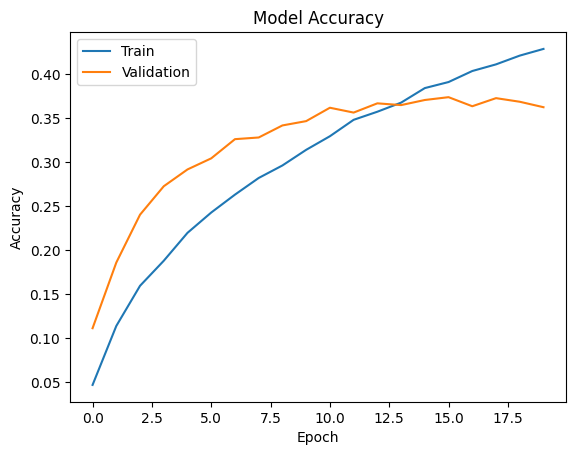

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step


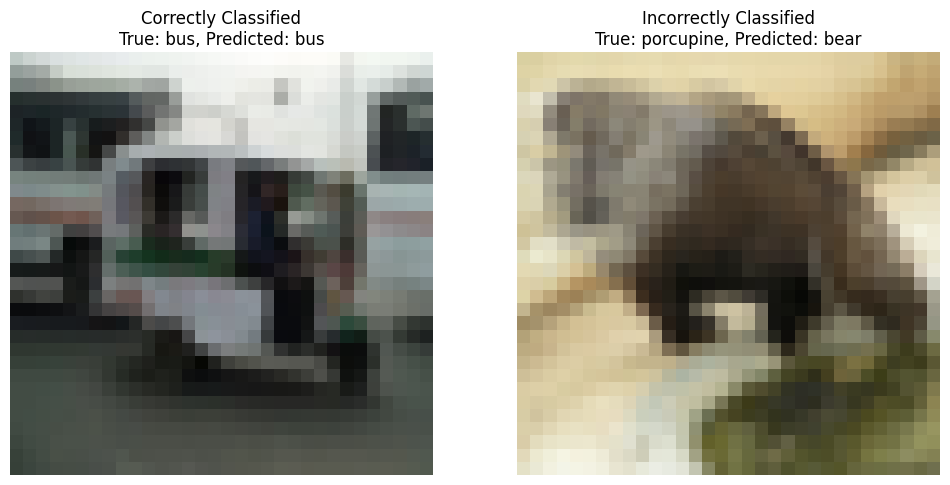

Correctly classified image probabilities: [5.2105865e-08 8.3897954e-05 7.3851920e-06 3.3061713e-06 2.5245361e-06
 1.0282220e-03 5.3253513e-07 1.5437252e-05 1.0081657e-03 7.6895682e-05
 4.1875651e-04 2.2475478e-04 1.0288989e-03 7.3444736e-01 1.8601507e-04
 4.3186240e-08 6.2504777e-04 3.3655038e-08 1.7667697e-05 9.0343604e-04
 2.0910138e-05 5.4032453e-06 3.1424206e-04 5.3591851e-09 4.3157499e-08
 2.5675429e-03 5.5101751e-05 1.0808285e-06 1.1254025e-06 2.5791248e-06
 3.0577154e-09 2.1712340e-08 1.4811976e-05 2.7899810e-06 1.3269002e-07
 2.1927455e-05 1.5849307e-09 3.9273910e-03 6.7877795e-07 1.1576620e-03
 2.4887448e-04 3.5734978e-03 3.6643648e-08 1.2041612e-09 1.4951913e-05
 5.0339755e-04 2.3447586e-05 6.9835153e-08 5.0957683e-03 1.1065582e-07
 5.5563714e-08 9.6185264e-05 1.2085746e-09 2.6043729e-08 4.3771783e-05
 4.1984395e-06 1.1247345e-07 1.5101544e-06 1.3063812e-01 8.9954699e-07
 1.0279488e-08 1.4881402e-06 2.9049238e-07 6.1511192e-11 4.8673123e-06
 8.6740274e-06 8.2868928e-06 5.6287

In [77]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


import numpy as np
import matplotlib.pyplot as plt

y_pred = model.predict(x_val)


y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)


correct_indices = np.where(y_pred_classes == y_true_classes)[0]
incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]


correct_idx = correct_indices[0]  # First correct image
incorrect_idx = incorrect_indices[0]  # First incorrect image


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(x_val[correct_idx])
plt.title(f"Correctly Classified\nTrue: {class_names[y_true_classes[correct_idx]]}, Predicted: {class_names[y_pred_classes[correct_idx]]}")
plt.axis('off')

# Plot the incorrect image
plt.subplot(1, 2, 2)
plt.imshow(x_val[incorrect_idx])
plt.title(f"Incorrectly Classified\nTrue: {class_names[y_true_classes[incorrect_idx]]}, Predicted: {class_names[y_pred_classes[incorrect_idx]]}")
plt.axis('off')



plt.show()
print(f'Correctly classified image probabilities: {y_pred[correct_idx]}')
print(f'Incorrectly classified image probabilities: {y_pred[incorrect_idx]}')



Training and validation accuracies are increasing while losses are decreasing. This shows steady improvement over each epoch, suggesting minimal overfitting. The accuracy also grows logarithmically, suggesting fast learning initially.

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [79]:
model2 = Sequential()

# Con layer 1
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model2.add(BatchNormalization())
#model2.add(Dropout(0.2))
#model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model2.add(MaxPooling2D((2, 2)))

# Con layer 2
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
#model2.add(Dropout(0.2))
#model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D((2, 2)))

# Con layer 3
model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
#model2.add(Dropout(0.2))
model2.add(MaxPooling2D((2, 2)))

# Flatten
#model2.add(Flatten())
model2.add(GlobalAveragePooling2D())

# Dense 1
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))

# Output layer
model2.add(Dense(100, activation='softmax'))

model2.summary()

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_61 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_62 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_44 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_46 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 100)                 │          12,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123,556 (482.64 KB)

 Trainable params: 123,108 (480.89 KB)

 Non-trainable params: 448 (1.75 KB)

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [80]:
history = model2.fit(
    x_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    shuffle=True
)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 133s 104ms/step - accuracy: 0.0551 - loss: 4.2854 - val_accuracy: 0.1350 - val_loss: 3.6801
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 105ms/step - accuracy: 0.1493 - loss: 3.5260 - val_accuracy: 0.1774 - val_loss: 3.3517
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 105ms/step - accuracy: 0.2121 - loss: 3.1801 - val_accuracy: 0.2507 - val_loss: 2.9776
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 139s 103ms/step - accuracy: 0.2565 - loss: 2.9474 - val_accuracy: 0.2795 - val_loss: 2.7971
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 134s 107ms/step - accuracy: 0.2803 - loss: 2.7930 - val_accuracy: 0.2748 - val_loss: 2.8925
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 130s 104ms/step - accuracy: 0.3065 - loss: 2.6738 - val_accuracy: 0.2380 - val_loss: 3.1575
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 140s 102ms/step - accuracy: 0.3276 - loss: 2.5723 - val_accuracy: 0.3328 - val_loss: 2.5781
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 102ms/step - ac

In [81]:
from sklearn.metrics import f1_score
import numpy as np

test_loss, test_accuracy = model2.evaluate(x_test, y_test, verbose=0)

# Get predictions from the model
y_pred = model2.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Calculate F1-Score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')  # 'weighted' handles class imbalance
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step
Test Loss: 2.3649
Test Accuracy: 0.3947
F1-Score: 0.3982


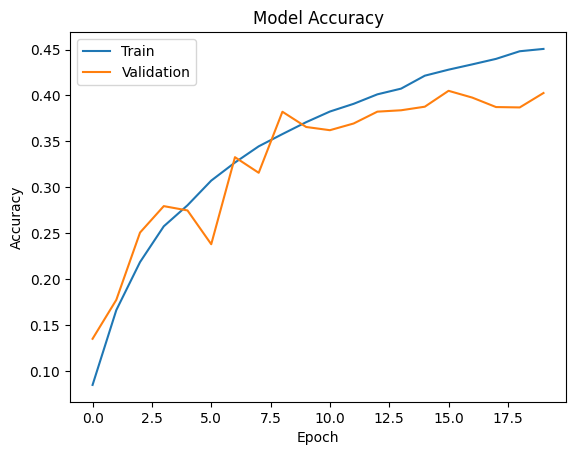

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step


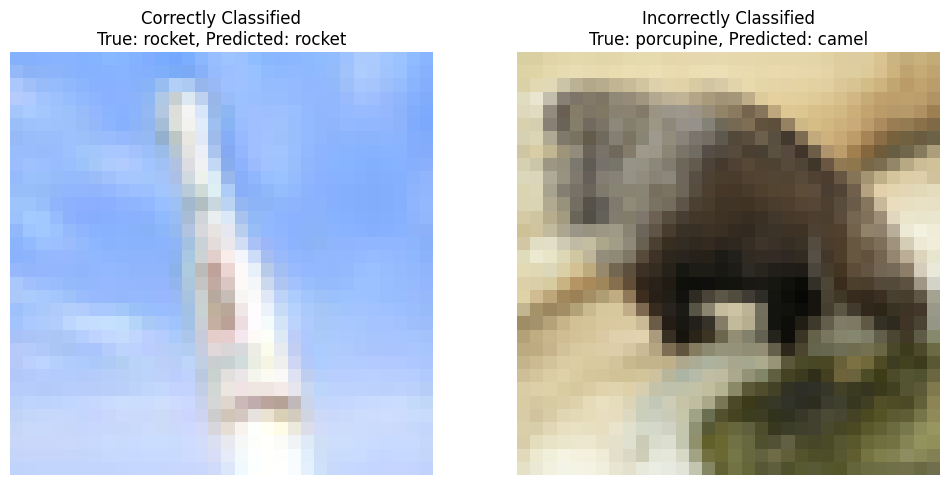

Correctly classified image probabilities: [1.26692757e-05 5.87467293e-05 5.72269084e-04 6.51530572e-04
 4.13871476e-06 1.80264306e-03 2.53843700e-05 3.17918311e-04
 2.50200119e-05 2.45034676e-02 7.03046005e-03 7.62628188e-05
 1.28322176e-03 5.78042886e-07 9.13836120e-05 8.78561521e-04
 3.12269735e-03 1.89745751e-05 5.29279560e-03 3.89468914e-05
 1.27979671e-03 1.01149865e-07 8.33799690e-03 2.80452687e-02
 2.25833128e-03 6.03485096e-04 6.25505985e-04 2.86693667e-05
 4.38936986e-02 9.06457426e-04 1.37200381e-03 1.68203078e-05
 2.16810149e-03 2.11833594e-05 1.01763449e-04 9.46442451e-05
 2.41023896e-04 1.15150353e-04 8.67263356e-04 1.08143790e-02
 8.17431211e-02 3.88418295e-04 1.78951213e-05 1.30628848e-06
 7.96430185e-03 9.15592973e-05 3.75243457e-04 1.39453223e-05
 1.34599929e-07 9.22700157e-04 8.29764362e-03 2.72615842e-04
 2.11909352e-07 1.48630497e-05 6.15561521e-03 1.09401077e-03
 3.59869940e-04 1.64979715e-02 1.10799316e-08 3.42907588e-04
 1.91875064e-04 1.20236557e-02 1.26470986e-

In [82]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


import numpy as np
import matplotlib.pyplot as plt

y_pred = model2.predict(x_val)


y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)


correct_indices = np.where(y_pred_classes == y_true_classes)[0]
incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]


correct_idx = correct_indices[0]  # First correct image
incorrect_idx = incorrect_indices[0]  # First incorrect image


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(x_val[correct_idx])
plt.title(f"Correctly Classified\nTrue: {class_names[y_true_classes[correct_idx]]}, Predicted: {class_names[y_pred_classes[correct_idx]]}")
plt.axis('off')

# Plot the incorrect image
plt.subplot(1, 2, 2)
plt.imshow(x_val[incorrect_idx])
plt.title(f"Incorrectly Classified\nTrue: {class_names[y_true_classes[incorrect_idx]]}, Predicted: {class_names[y_pred_classes[incorrect_idx]]}")
plt.axis('off')



plt.show()
print(f'Correctly classified image probabilities: {y_pred[correct_idx]}')
print(f'Incorrectly classified image probabilities: {y_pred[incorrect_idx]}')

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

The model's performance improved due to implementing batch normalization which
 stabilizes layer activations and converges learning faster by managing internal covariance shift (i.e. zero mean and unit variance), and dropout, which reduces overfitting by randomly deactivating neurons during training. However, while there was a slight improvement at the beginning of the epochs, performance is still suboptimal, as F-score is still below 0.5. The reason might be due to lack of fine tuning of learning rates and depth of architecture.

 There is still room for improvement, e.g. fine tuning learning rates for adam, deeper architecture, and further data augmentation should be investigated. Finally, the number of epochs can be increased.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.